In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [73]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [74]:
train_set=train.flow_from_directory('../input/aifruit/AI(FRUIT)/train',
                                    target_size = (150,150),
                                    batch_size = 128,
                                    class_mode = 'categorical')
validation_set=validation.flow_from_directory('../input/aifruit/AI(FRUIT)/validation',
                                              target_size = (150,150),
                                              batch_size = 128,
                                              class_mode = 'categorical')        

Found 8648 images belonging to 10 classes.
Found 1512 images belonging to 10 classes.


In [75]:
train_set.class_indices

{'apple': 0,
 'banana': 1,
 'cherry': 2,
 'coconut': 3,
 'coffee': 4,
 'kiwi': 5,
 'lemon': 6,
 'mango': 7,
 'orange': 8,
 'tomato': 9}

In [76]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dense(10,activation='softmax'))

In [77]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 37, 37, 64)      

In [78]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [79]:
history = model.fit(train_set,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
721/721 [==============================] - 173s 239ms/step - loss: 2.2463 - accuracy: 0.1363 - val_loss: 2.1165 - val_accuracy: 0.1594
Epoch 2/50
721/721 [==============================] - 173s 240ms/step - loss: 1.9000 - accuracy: 0.2818 - val_loss: 1.8321 - val_accuracy: 0.3433
Epoch 3/50
721/721 [==============================] - 173s 239ms/step - loss: 1.6425 - accuracy: 0.3988 - val_loss: 1.6667 - val_accuracy: 0.3995
Epoch 4/50
721/721 [==============================] - 173s 239ms/step - loss: 1.4991 - accuracy: 0.4580 - val_loss: 1.5192 - val_accuracy: 0.4643
Epoch 5/50
721/721 [==============================] - 173s 240ms/step - loss: 1.3800 - accuracy: 0.5077 - val_loss: 1.3581 - val_accuracy: 0.5364
Epoch 6/50
721/721 [==============================] - 174s 241ms/step - loss: 1.2586 - accuracy: 0.5608 - val_loss: 1.7314 - val_accuracy: 0.4438
Epoch 7/50
721/721 [==============================] - 174s 242ms/step - loss: 1.1490 - accuracy: 0.5990 - val_loss: 1.2117 -

In [80]:
model.save('./Fruit.h5')

In [81]:
model = load_model('./Fruit.h5')

In [82]:
score=model.evaluate(validation_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

126/126 [==============================] - 11s 83ms/step - loss: 3.6035 - accuracy: 0.6806
Sai số:  3.603531837463379
Độ chính xác:  0.6805555820465088


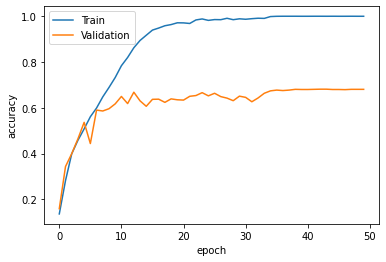

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Apple


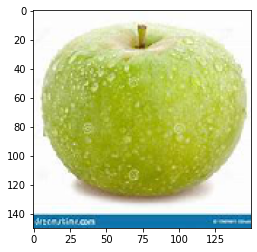

In [86]:
img=load_img("../input/aifruit/AI(FRUIT)/test/apple/158.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Apple'
if round(result[0][1])==1:
  prediction='Banana'
if round(result[0][2])==1:
  prediction='Cherry'
if round(result[0][3])==1:
  prediction='Coconut'
if round(result[0][4])==1:
  prediction='Coffe'
if round(result[0][5])==1:
  prediction='Kiwi'
if round(result[0][6])==1:
  prediction='Lemon'
if round(result[0][7])==1:
  prediction='Mango'
if round(result[0][8])==1:
  prediction='Orange'
if round(result[0][9])==1:
  prediction='Tomato'
print(prediction)